EXAMEN DE TRATAMIENTO DE DATOS

Desarrollado por: ROBERTO CARLOS SARMIENTO LAVAYEN

PRUEBA FINAL.

Se pide:

1. Crear un repositorio de Github (publico) en el que se va a subir un jupyter notebook y un archivo README.md (como mínimo)

2. Obtener unclasificador de imágenes de forma que Cada una nueva imagen se pueda obtener la clase correspondiente.

3. Se pide obtener las matrices de confusión del modelo, la matriz de confusión del error en training y la de test. Se valorará la justificación de las técnicas de procesamiento de imágenes utilizadas (cambios de color, reducción de colores, aumento del contraste, detección de bordes, uso de convoluciones....) , asi como el uso de clasificadores que otros grupos no estén utilizando, para que en el debate podáis compartir los resultados que se obtienen con otros tipos de modelos (por modelos se entiende: Modelos lineales, SVM, KNN, CNN...)

convoluciones a realizar

1. Para explicar el cálculo
2. Para enfoque
3. Desenfoque
4. Detección de bordes
5. Suavizado

In [ ]:
#!pip install keras
#!pip install tensorflow
#!pip install mlxtand
#!pip install tensorflow

In [3]:
import os
from scipy import signal
import numpy as np
from skimage.color import rgb2gray
from skimage import io

import cv2
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils

from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#creación de dataset
#para que se robuste el analisis
DG_folder='DG_data'
images_increased = 5

try:
    os.mkdir(DG_folder)
except:
    print("")
    
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)


data_path = "C:/Users/Roberto/Desktop/EXAMEN/train/CLASS_08"
data_dir_list = os.listdir(data_path)


width_shape, height_shape = 224, 244

i=0
num_images=0
for image_file in data_dir_list:
    img_list=os.listdir(data_path)

    img_path = data_path + '/'+ image_file

    imge=load_img(img_path)
    
    imge=cv2.resize(image.img_to_array(imge), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
    x= imge/255
    x=np.expand_dims(x,axis=0)
    t=1
    for output_batch in train_datagen.flow(x,batch_size=1):
        a=image.img_to_array(output_batch[0])
        imagen=output_batch[0,:,:]*255
        imgfinal = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        cv2.imwrite(DG_folder+"/%i%i.png"%(i,t), imgfinal) 
        t+=1
        
        num_images+=1
        if t>images_increased:
            break
    i+=1
    
print("images generated",num_images)


images generated 1575


In [12]:
#configuracion de parametros

width_shape = 224
height_shape = 224
num_classes = 8
epochs = 10
batch_size = 32 

In [13]:
#path de dataset

train_data_dir = 'C:/Users/Roberto/Desktop/EXAMEN/train'  
validation_data_dir = 'C:/Users/Roberto/Desktop/EXAMEN/Validacion'

In [14]:
#Generador de imágenes (entrenamiento y validación)

train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')


Found 8170 images belonging to 8 classes.
Found 36 images belonging to 8 classes.


In [15]:
#Creación y entrenamiento de modelo CNN
#Creación de modelo 
nb_train_samples = 1490
nb_validation_samples = 10

model = Sequential()

inputShape = (height_shape, width_shape, 3)
model.add(Conv2D(32,(3,3), input_shape=inputShape))
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D())
          
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(num_classes,activation='softmax', name='output'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

model_history = model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 64)      36928     
                                                        

C:\Users\Roberto\AppData\Local\Temp\ipykernel_1384\948177592.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/10
46/46 [==============================] - 157s 3s/step - loss: 11.5470 - accuracy: 0.3254
Epoch 2/10
46/46 [==============================] - 158s 3s/step - loss: 6.1430 - accuracy: 0.4416
Epoch 3/10
46/46 [==============================] - 154s 3s/step - loss: 4.7923 - accuracy: 0.4545
Epoch 4/10
46/46 [==============================] - 157s 3s/step - loss: 3.6663 - accuracy: 0.4783
Epoch 5/10
46/46 [==============================] - 158s 3s/step - loss: 3.2540 - accuracy: 0.4572
Epoch 6/10
46/46 [==============================] - 151s 3s/step - loss: 2.6367 - accuracy: 0.4841
Epoch 7/10
46/46 [==============================] - 154s 3s/step - loss: 2.4984 - accuracy: 0.4857
Epoch 8/10
46/46 [==============================] - 152s 3s/step - loss: 2.3298 - accuracy: 0.4876
Epoch 9/10
46/46 [==============================] - 157s 3s/step - loss: 2.1667 - accuracy: 0.4864
Epoch 10/10
46/46 [==============================] - 158s 3s/step - loss: 2.0633 - accuracy: 0.4932


In [16]:
#Entrenamiento de modelo VGG16

nb_train_samples = 1490
nb_validation_samples = 10

image_input = Input(shape=(width_shape, height_shape, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False
    

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

custom_vgg_model.summary()

model_history = custom_vgg_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

C:\Users\Roberto\AppData\Local\Temp\ipykernel_1384\1849091457.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = custom_vgg_model.fit_generator(


Epoch 1/10
46/46 [==============================] - 326s 7s/step - loss: 4.2765 - accuracy: 0.0734
Epoch 2/10
46/46 [==============================] - 302s 7s/step - loss: 4.1972 - accuracy: 0.0747
Epoch 3/10
46/46 [==============================] - 306s 7s/step - loss: 3.9171 - accuracy: 0.0958
Epoch 4/10
46/46 [==============================] - 304s 7s/step - loss: 3.8367 - accuracy: 0.0978
Epoch 5/10
46/46 [==============================] - 308s 7s/step - loss: 3.6954 - accuracy: 0.1053
Epoch 6/10
46/46 [==============================] - 321s 7s/step - loss: 3.5970 - accuracy: 0.1062
Epoch 7/10
46/46 [==============================] - 279s 6s/step - loss: 3.3823 - accuracy: 0.1039
Epoch 8/10
46/46 [==============================] - 275s 6s/step - loss: 3.2702 - accuracy: 0.1046
Epoch 9/10
46/46 [==============================] - 179s 4s/step - loss: 3.1032 - accuracy: 0.1135
Epoch 10/10
46/46 [==============================] - 177s 4s/step - loss: 2.9843 - accuracy: 0.1155


In [17]:
#Grabar modelo en disco

custom_vgg_model.save("model_VGG16.h5")

In [18]:
#Gráficas de entrenamiento y validación (accuracy - loss)

def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

KeyError: 'val_loss'

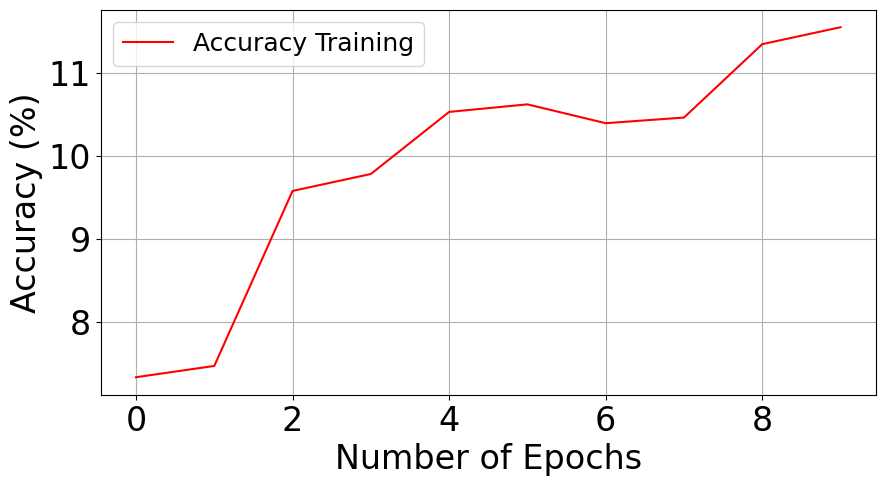

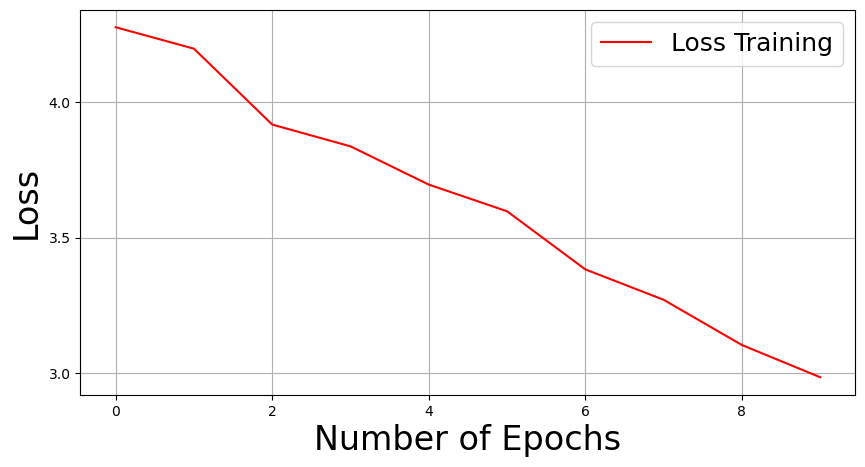

In [19]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

1/1 [==============================] - 1s 1s/step
CLASS_02


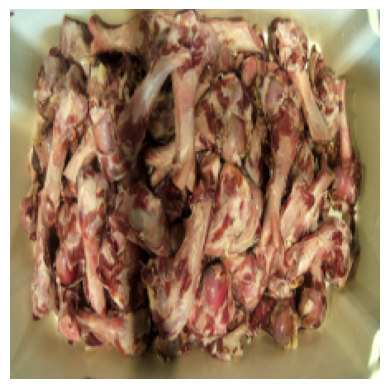

In [20]:
#Predicción usando el modelo entrenado

from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04',' CLASS_05',
         'CLASS_06','CLASS_07 ','CLASS_08']

#modelt = load_model("model_VGG16.h5")
modelt = custom_vgg_model

imaget_path = "C:/Users/Roberto/Desktop/EXAMEN/test/CLASS_02/13-CAPTURE_20220531_130759_627.png"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 810 images belonging to 8 classes.


C:\Users\Roberto\AppData\Local\Temp\ipykernel_1384\3020190494.py:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.0602    0.2708    0.0985        48
           2     0.3171    0.2680    0.2905        97
           3     0.3333    0.0222    0.0417        45
           4     0.8000    0.0349    0.0668       459
           5     0.0000    0.0000    0.0000        19
           6     0.1376    0.5614    0.2211       114
           7     0.0000    0.0000    0.0000        27

    accuracy                         0.1481       810
   macro avg     0.2060    0.1447    0.0898       810
weighted avg     0.5328    0.1481    0.1119       810



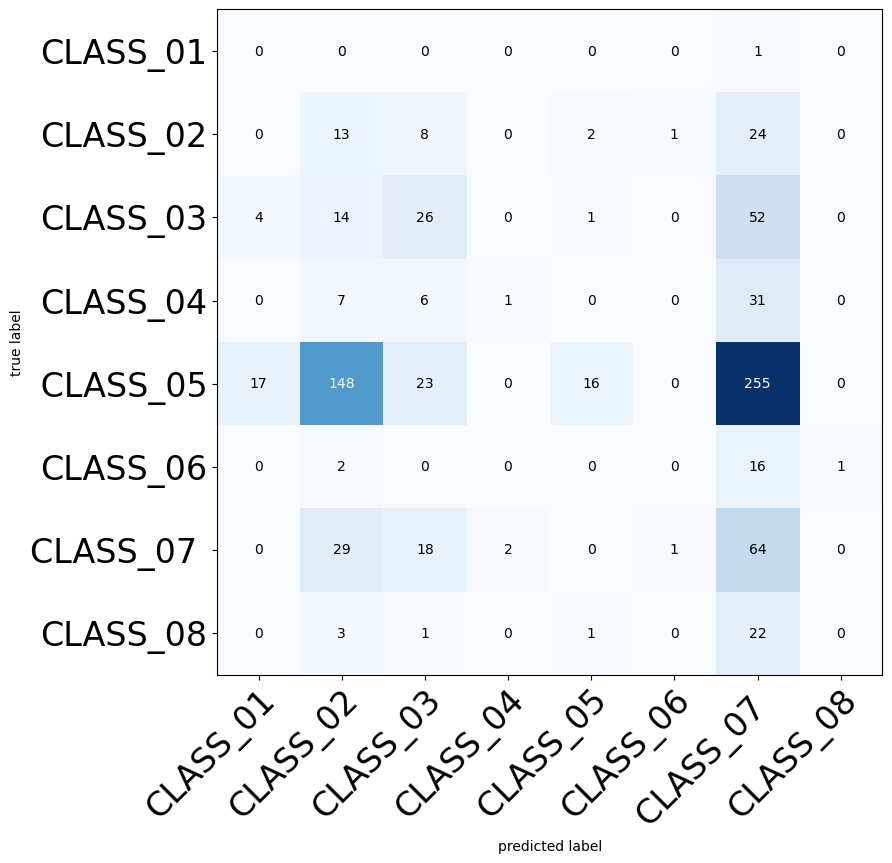

In [21]:
#Matriz de confusión y métricas de desempeño

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04',' CLASS_05',
         'CLASS_06','CLASS_07 ','CLASS_08']


test_data_dir = 'C:/Users/Roberto/Desktop/EXAMEN/test'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model_VGG16.h5")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

In [22]:
print(y_real)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [23]:
print(y_pred)


[6 1 1 6 1 6 6 6 1 6 6 1 1 4 2 2 6 1 2 1 2 6 2 6 2 1 1 2 6 6 1 6 6 4 6 6 6
 6 5 6 2 6 6 6 6 1 1 6 6 2 1 6 6 2 6 6 6 6 6 4 2 2 6 6 2 2 2 2 2 0 2 6 1 0
 6 6 2 6 2 2 6 6 2 1 1 6 2 6 6 6 6 1 6 6 6 6 1 6 2 6 1 6 0 2 2 6 2 2 1 2 1
 6 6 6 6 6 6 0 6 2 2 6 6 2 6 6 1 6 6 6 1 6 1 2 1 6 6 6 6 6 6 6 6 2 6 1 6 6
 6 6 6 2 6 2 6 6 6 1 2 3 6 6 6 2 1 2 6 6 6 6 6 6 6 1 6 6 6 6 6 1 1 6 6 2 6
 6 6 1 1 6 6 4 1 1 6 6 6 6 1 1 1 1 1 6 1 1 6 6 6 1 1 1 6 6 6 1 2 1 6 1 1 6
 6 6 6 6 2 6 6 1 1 6 1 6 6 1 1 6 2 1 1 1 6 0 2 6 1 6 6 6 6 6 1 6 6 6 1 1 0
 1 1 1 1 6 6 1 2 6 6 6 6 6 4 1 6 6 6 6 6 6 6 1 6 6 4 6 1 6 0 6 6 6 1 6 6 6
 4 1 6 1 6 6 1 6 1 4 6 1 1 6 2 6 6 6 6 6 6 6 6 4 6 6 2 6 4 2 6 6 1 1 6 6 1
 6 1 1 6 0 6 6 6 1 1 6 6 6 1 1 6 1 1 6 6 6 6 0 6 0 6 0 6 6 1 1 1 6 4 1 6 6
 1 6 6 1 6 1 1 6 1 6 6 6 6 6 4 6 6 6 1 6 2 6 6 6 1 1 6 1 2 6 1 1 6 6 0 1 6
 6 0 6 6 6 6 6 0 2 1 6 1 2 1 1 6 6 6 1 1 6 1 6 6 6 6 4 6 6 6 6 6 6 6 1 6 6
 6 1 6 1 6 1 6 6 1 6 2 2 1 1 6 1 6 6 4 6 6 6 1 6 6 2 6 6 6 1 6 6 1 1 6 1 6
 1 1 4 1 1 1 1 6 1 6 1 6 

Pruebas de filtros en el trataiento de imagenes

creación de matriz y kernel

In [24]:
Matriz = np.array([[1,1,1,1], [1,1,1,1], [0,0,0,0], [0,0,0,0]])
kernel = np.array([[1,1], [-1,-1]])
Matriz

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Convolución para imágenes

Se calcular la convolución entre una imagen y un kernel. Se muestra la imagen original y la imagen ha filtrar

In [25]:
def show_convolve2d(imagen, kernel):
    
    %matplotlib notebook
    plt.ion()
    
    imagen_list = []
    for d in range(3):
        temp = signal.convolve2d(imagen[:,:,d] , kernel,  boundary='symm',mode='same')
        imagen_list.append(temp)

    imagen_filt = np.stack(imagen_list, axis=2)
    imagen_filt[imagen_filt > 216] = 216
    imagen_filt[imagen_filt < 0] = 0
    imagen_filt = imagen_filt.astype("uint8")

    plt.subplot(1,2,1)
    io.imshow(imagen_filt)
    plt.axis('off')

    plt.subplot(1,2,2)
    io.imshow(imagen)
    plt.axis('off')

    io.show()    

Carga de imagen de prueba 

In [28]:
filename = os.path.join('train/CLASS_02/', '12.png')
imagen = io.imread(filename)

ENFOQUE

<IPython.core.display.Javascript object>


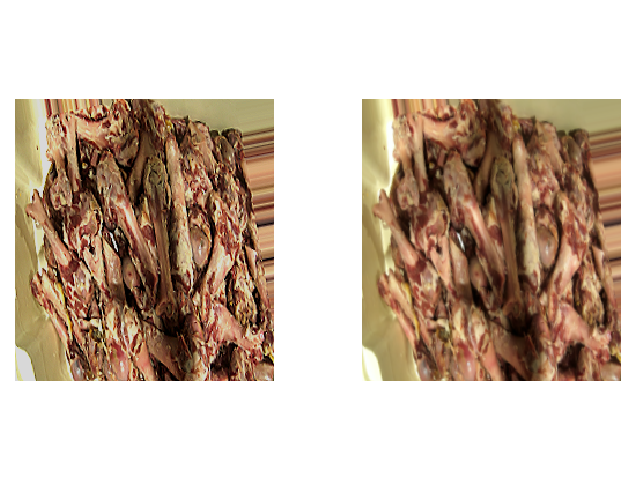

In [29]:
k=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
show_convolve2d(imagen,k)

DESENFOQUE 

<IPython.core.display.Javascript object>


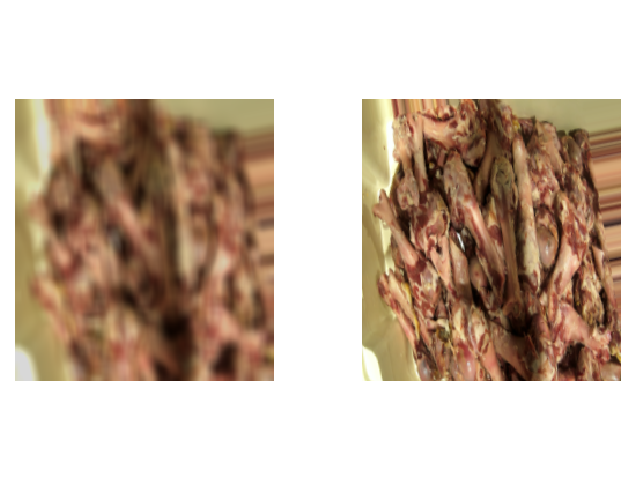

In [30]:
tam=10
k=np.ones((tam, tam))/(tam**2)
show_convolve2d(imagen,k)

DETECCIÓN DE BORDES

<IPython.core.display.Javascript object>


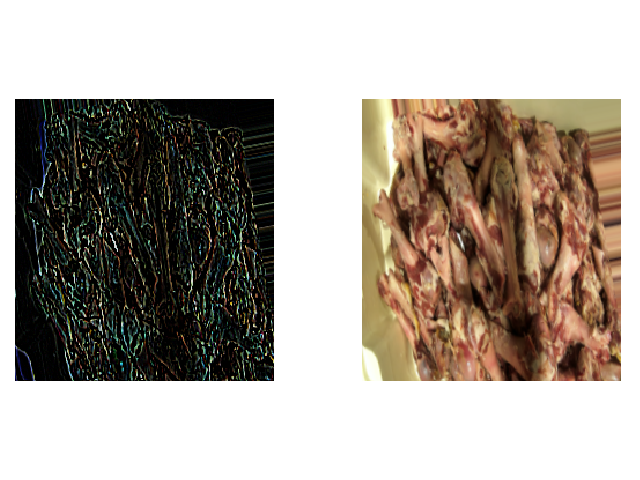

In [31]:
k=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
show_convolve2d(imagen ,k)

SUABIZADO

<IPython.core.display.Javascript object>


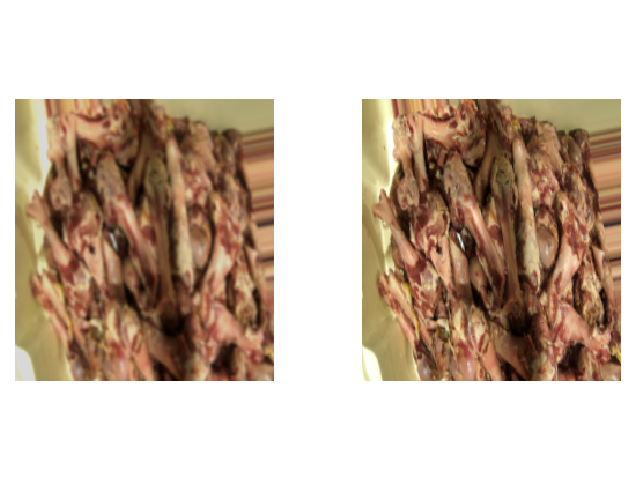

In [32]:
tam=5
k = signal.gaussian(tam, 1).reshape(-1, 1)@signal.gaussian(tam, 1).reshape(1, -1)
k=k/np.sum(k)
show_convolve2d(imagen ,k) 